In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/seerat16/loan-risk-analysis/main/loan%20data.csv')
df.shape

(11881, 122)

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['TARGET'].value_counts()

0    10962
1      919
Name: TARGET, dtype: int64

In [5]:
missing_val = df.isnull().sum()
missing_val

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1618
AMT_REQ_CREDIT_BUREAU_WEEK    1618
AMT_REQ_CREDIT_BUREAU_MON     1618
AMT_REQ_CREDIT_BUREAU_QRT     1618
AMT_REQ_CREDIT_BUREAU_YEAR    1618
Length: 122, dtype: int64

In [6]:
missing_percentage = pd.DataFrame({'Columns':missing_val.index,'Percentage':(missing_val.values/df.shape[0])*100})
missing_percentage

,Columns,Percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.618382
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.618382
119,AMT_REQ_CREDIT_BUREAU_MON,13.618382
120,AMT_REQ_CREDIT_BUREAU_QRT,13.618382


In [7]:
import seaborn as sns

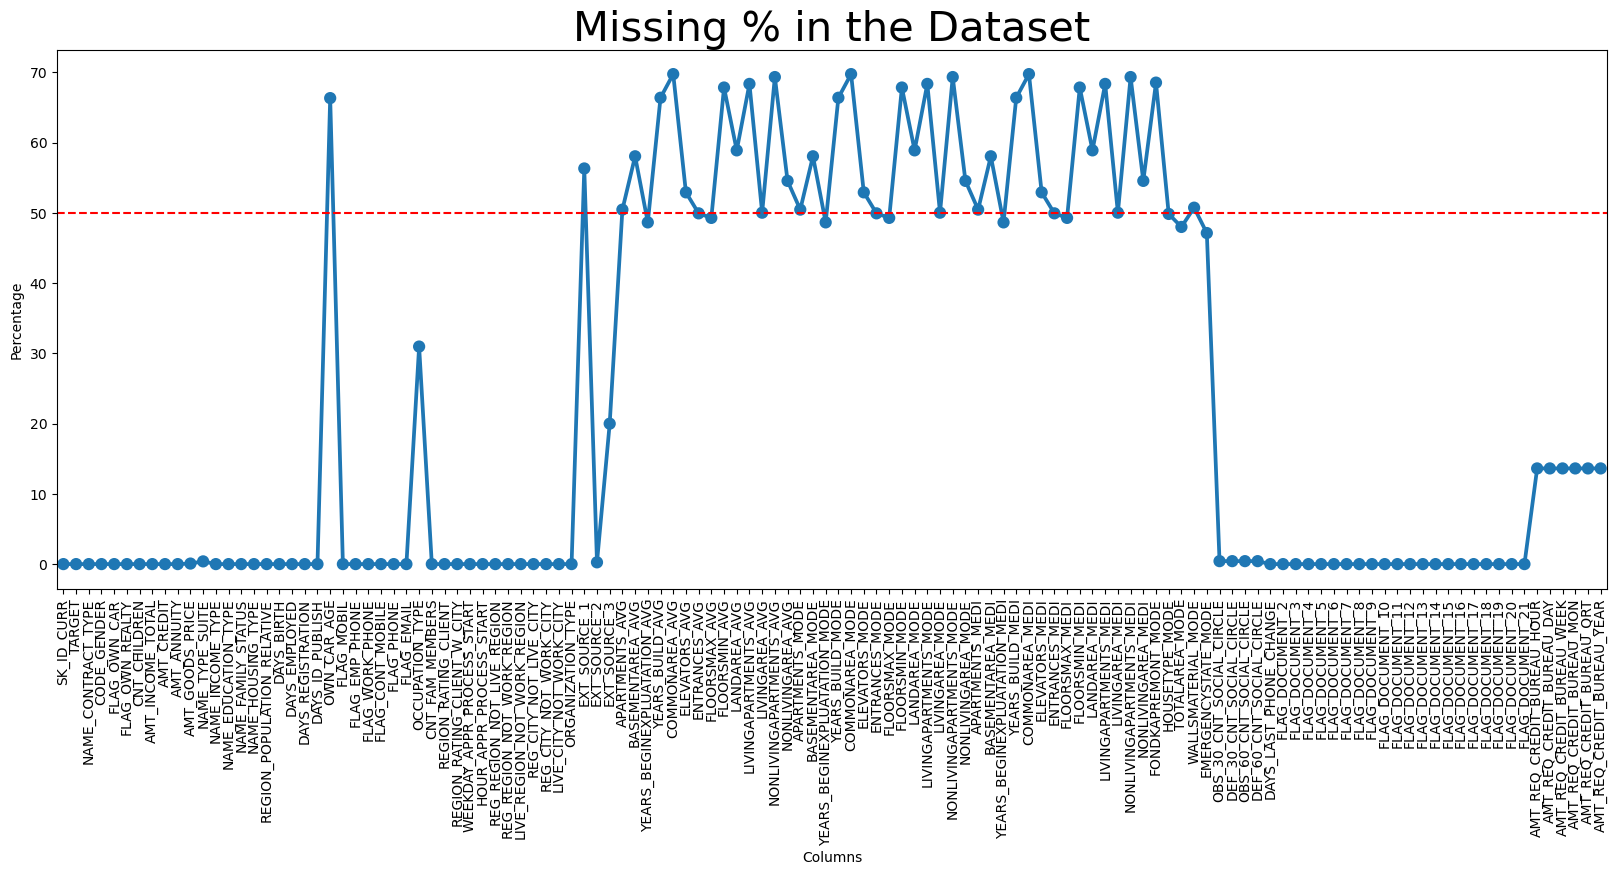

In [8]:
plt.figure(figsize=(20,7))
sns.pointplot(data=missing_percentage,x='Columns',y='Percentage')
plt.axhline(50,color='r',linestyle='--')
plt.title('Missing % in the Dataset',fontsize=30)
plt.xticks(rotation=90)
plt.show()




In [9]:

missing_more_50 = missing_percentage[missing_percentage['Percentage']>=50]
missing_more_50

,Columns,Percentage
21,OWN_CAR_AGE,66.332800
41,EXT_SOURCE_1,56.316808
44,APARTMENTS_AVG,50.458716
45,BASEMENTAREA_AVG,58.050669
47,YEARS_BUILD_AVG,66.383301
48,COMMONAREA_AVG,69.750021
49,ELEVATORS_AVG,52.916421
52,FLOORSMIN_AVG,67.839407
53,LANDAREA_AVG,58.892349
54,LIVINGAPARTMENTS_AVG,68.352832


In [10]:
df1=df.drop(columns=missing_more_50.Columns)

df1.shape
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
columns_to_delete= ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
       'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
       'EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

df2= df1.drop(columns=columns_to_delete)
df2.shape



(11881, 41)

In [12]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
less_50_missing = (df2.isnull().sum()/df2.shape[0])*100
less_50_missing[less_50_missing>0]

AMT_GOODS_PRICE                0.075751
NAME_TYPE_SUITE                0.387173
OCCUPATION_TYPE               30.965407
ENTRANCES_AVG                 49.928457
ENTRANCES_MODE                49.928457
ENTRANCES_MEDI                49.928457
HOUSETYPE_MODE                49.844289
OBS_30_CNT_SOCIAL_CIRCLE       0.420840
DEF_30_CNT_SOCIAL_CIRCLE       0.420840
OBS_60_CNT_SOCIAL_CIRCLE       0.420840
DEF_60_CNT_SOCIAL_CIRCLE       0.420840
AMT_REQ_CREDIT_BUREAU_HOUR    13.618382
AMT_REQ_CREDIT_BUREAU_DAY     13.618382
AMT_REQ_CREDIT_BUREAU_WEEK    13.618382
AMT_REQ_CREDIT_BUREAU_MON     13.618382
AMT_REQ_CREDIT_BUREAU_QRT     13.618382
AMT_REQ_CREDIT_BUREAU_YEAR    13.618382
dtype: float64

In [14]:
df2.AMT_GOODS_PRICE.describe()

count    1.187200e+04
mean     5.398998e+05
std      3.703184e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.961000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [15]:
df2['AMT_GOODS_PRICE']=df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].median())

In [16]:
df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      9625
Family             1569
Spouse, partner     417
Children            130
Other_B              59
Other_A              26
Group of people       9
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
df2['NAME_TYPE_SUITE']=df2['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [18]:
df2.SK_ID_CURR.nunique()

11881

In [19]:
df2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,11881.000000,11881.000000,11881.000000,1.188100e+04,1.188100e+04,11881.000000,1.188100e+04,11881.000000,11881.000000,11881.000000,...,11831.000000,11831.000000,11831.000000,11831.000000,10263.000000,10263.000000,10263.000000,10263.000000,10263.000000,10263.000000
mean,106925.210841,0.077350,0.420672,1.679229e+05,6.001597e+05,27097.031226,5.398317e+05,0.020878,-16006.503493,62471.532447,...,1.428113,0.148086,1.412391,0.103542,0.007308,0.007892,0.032057,0.272727,0.268732,1.877131
std,3990.805541,0.267158,0.724713,9.622997e+04,4.026772e+05,14369.179997,3.701863e+05,0.013928,4343.306664,140151.571027,...,2.303157,0.454205,2.283702,0.373935,0.088543,0.114425,0.189485,0.935643,0.614960,1.847743
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103467.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16447.500000,2.385000e+05,0.010006,-19584.000000,-2798.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106958.000000,0.000000,0.000000,1.440000e+05,5.123385e+05,24997.500000,4.500000e+05,0.018850,-15761.000000,-1220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,110366.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34749.000000,6.795000e+05,0.028663,-12351.000000,-290.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,113847.000000,1.000000,7.000000,2.250000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.000000,...,25.000000,5.000000,25.000000,5.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [20]:
df2.DAYS_BIRTH = df2.DAYS_BIRTH.abs()
df2.DAYS_EMPLOYED = df2.DAYS_EMPLOYED.abs()
df2.DAYS_REGISTRATION = df2.DAYS_REGISTRATION.abs()
df2.DAYS_ID_PUBLISH = df2.DAYS_ID_PUBLISH.abs()

In [21]:
df2['Age_Range'] = (df2.DAYS_BIRTH / 365).round(2)
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.07
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61


In [22]:
bins = [0,30,40,50,60,100]
labels = ['<30','30-40','40-50','50-60','60+']
df2['AGE_RANGE'] = pd.cut(df2.Age_Range,bins=bins,labels=labels)
df2.drop(columns='Age_Range',inplace=True)

In [23]:
df2.TARGET.value_counts(normalize=True)*100

0    92.264961
1     7.735039
Name: TARGET, dtype: float64

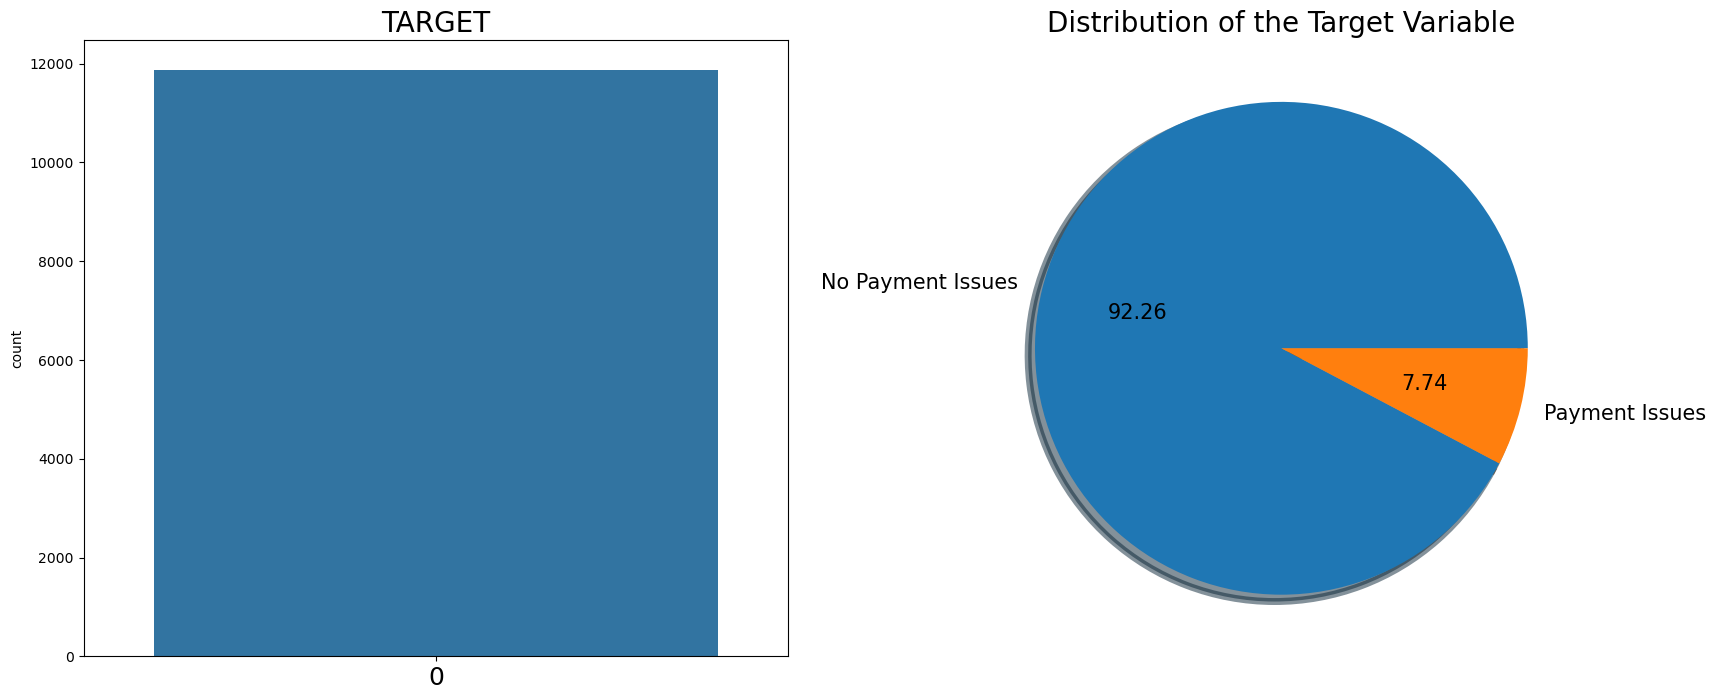

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(df2.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=df2.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [25]:
sns.set_style(style = 'whitegrid',rc={"grid.linewidth": 5})

In [26]:
df2.nunique().sort_values()

TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
AMT_REQ_CREDIT_BUREAU_HOUR        3
HOUSETYPE_MODE                    3
REGION_RATING_CLIENT              3
AGE_RANGE                         5
AMT_REQ_CREDIT_BUREAU_DAY         5
NAME_FAMILY_STATUS                5
NAME_EDUCATION_TYPE               5
AMT_REQ_CREDIT_BUREAU_WEEK        5
NAME_HOUSING_TYPE                 6
DEF_60_CNT_SOCIAL_CIRCLE          6
DEF_30_CNT_SOCIAL_CIRCLE          6
NAME_INCOME_TYPE                  6
NAME_TYPE_SUITE                   7
WEEKDAY_APPR_PROCESS_START        7
CNT_CHILDREN                      8
AMT_REQ_CREDIT_BUREAU_QRT         9
CNT_FAM_MEMBERS                   9
AMT_REQ_CREDIT_BUREAU_YEAR       13
AMT_REQ_CREDIT_BUREAU_MON        16
OCCUPATION_TYPE                  18
OBS_60_CNT_SOCIAL_CIRCLE         23
OBS_30_CNT_SOCIAL_CIRCLE         23
HOUR_APPR_PROCESS_START     

In [27]:
# Function for univariate analysis
def plots(l,rows=1,cols=1,rot=90):
        
    if cols>1:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,10))
        fig.subplots_adjust(hspace = .2, wspace=.2)
    
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,30))
        fig.subplots_adjust(hspace = .5, wspace=.1)
    
    
    # Subplot 1 : countplot 
    first = sns.countplot(data = df2 , hue = 'TARGET', palette='inferno',x=l,ax=ax1)
    first.set_title(l,fontsize=30)
    first.set_yscale('log')
    first.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=20)
    plt.setp(first.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)


    # Percentage of the mean values for defaulters
    default_percentage = (df2.groupby(by=l)['TARGET'].mean()*100).sort_values()
    
     # Subplot 2 : barplot
    sec = sns.barplot(x=default_percentage.index,y=default_percentage,ax=ax2)
    sec.set_title(f'Default % in {l}',fontsize=30)
    sec.set_yscale('linear')
    plt.setp(sec.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)
    return None

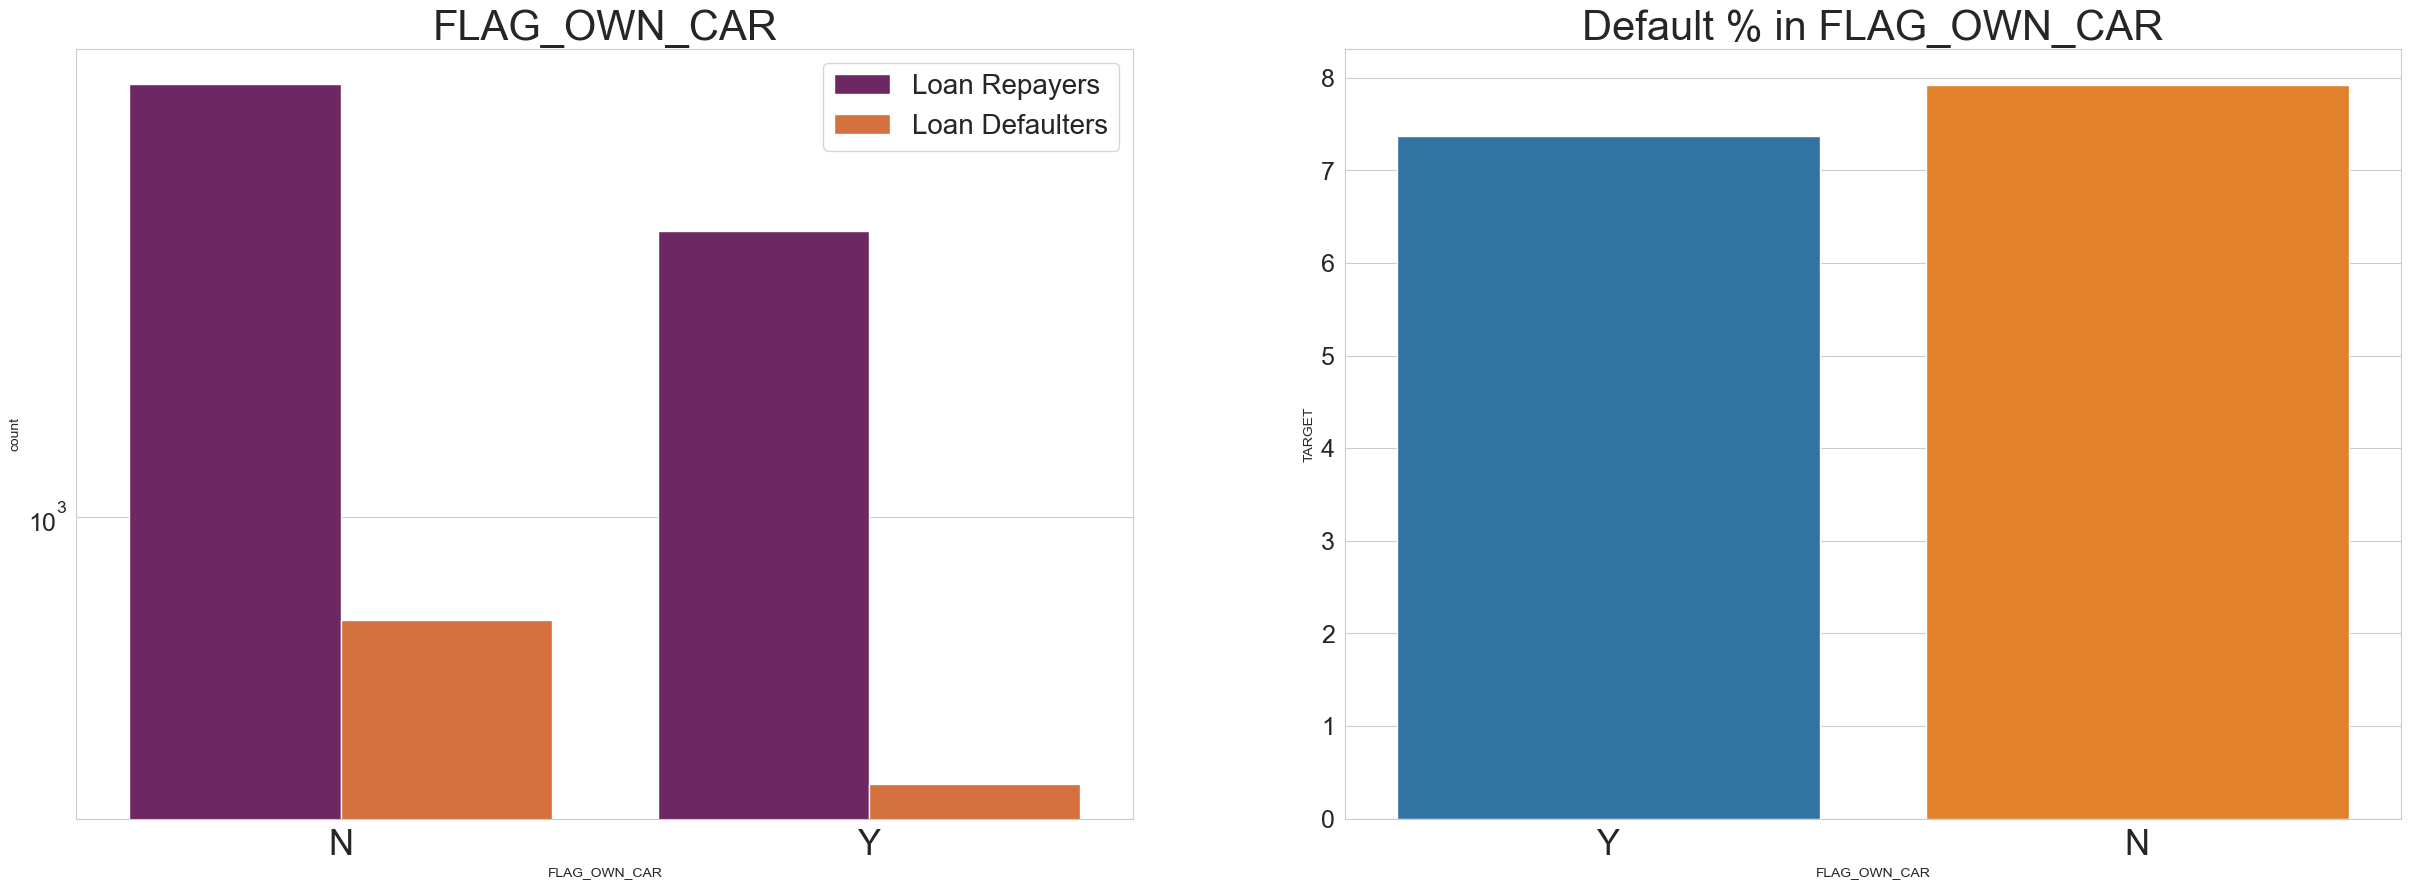

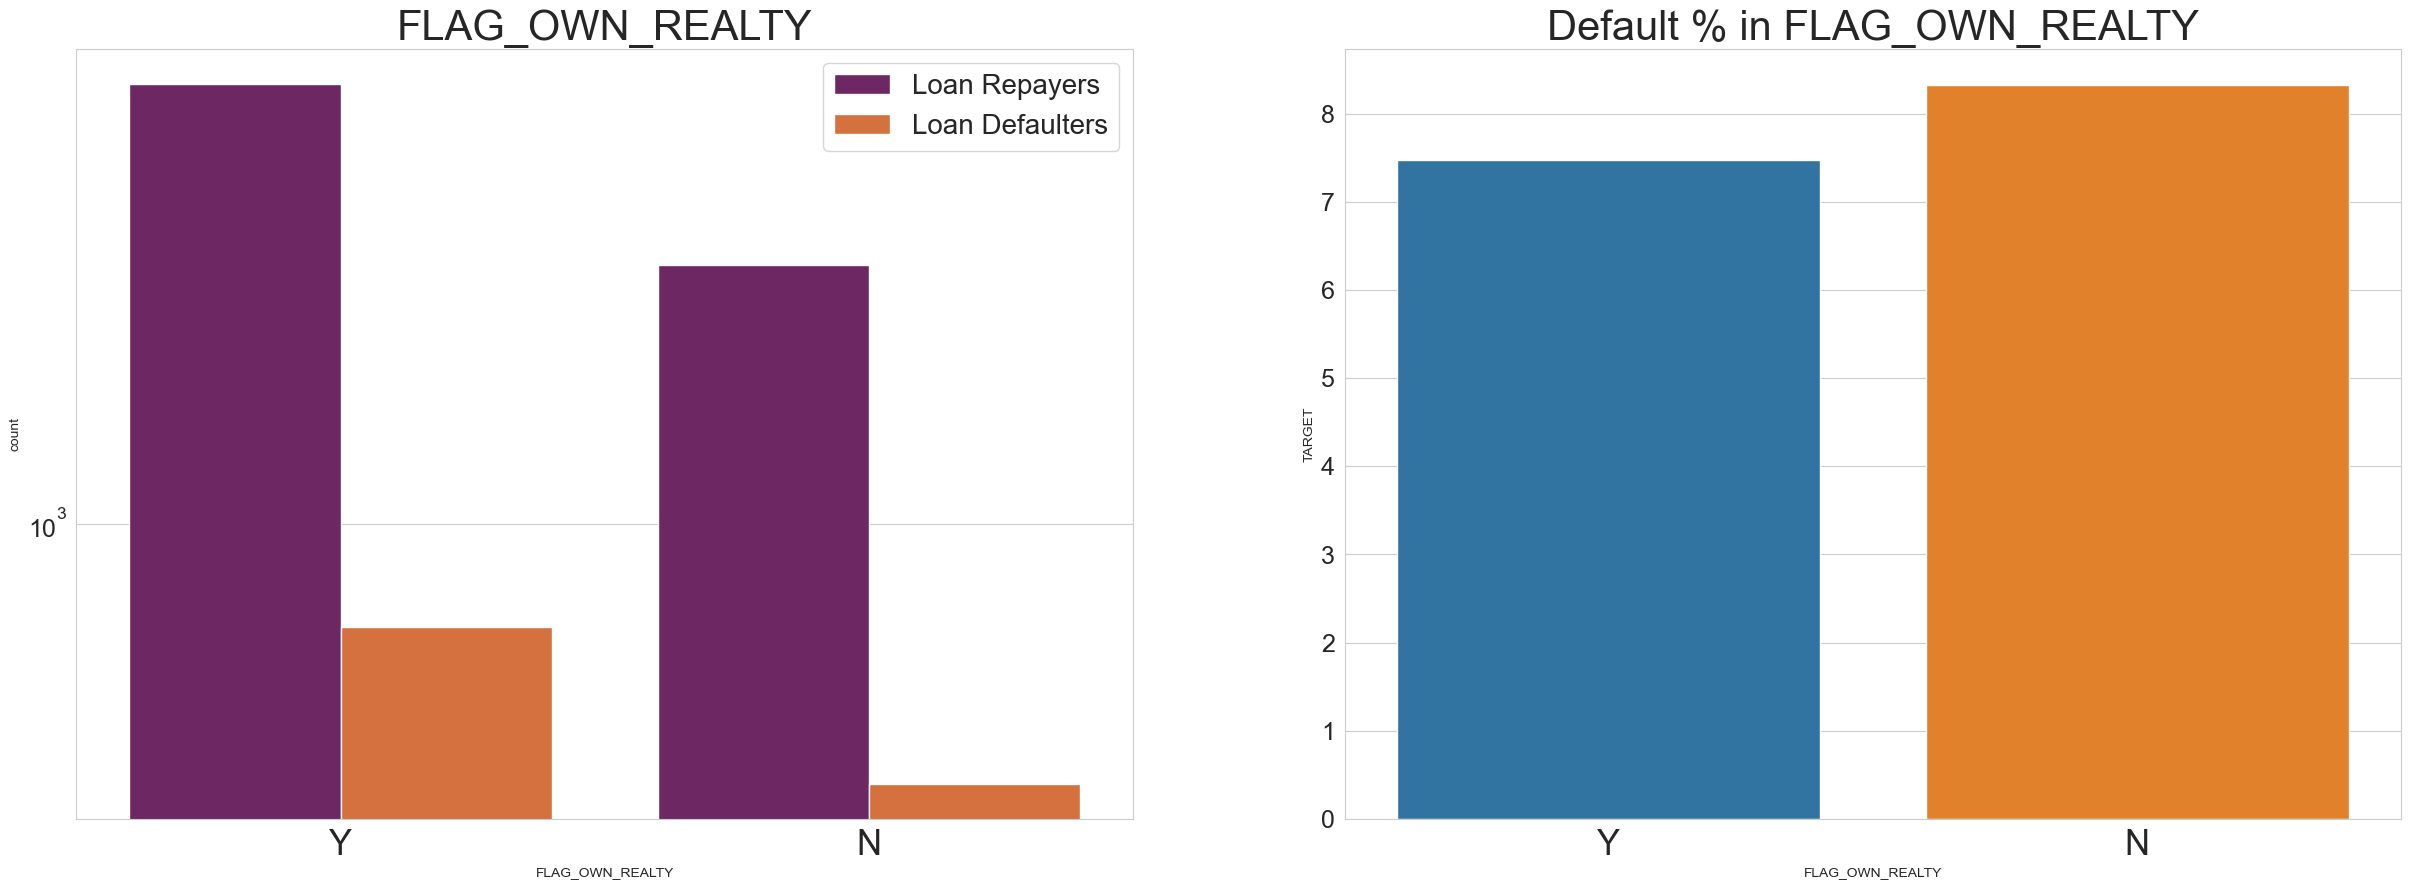

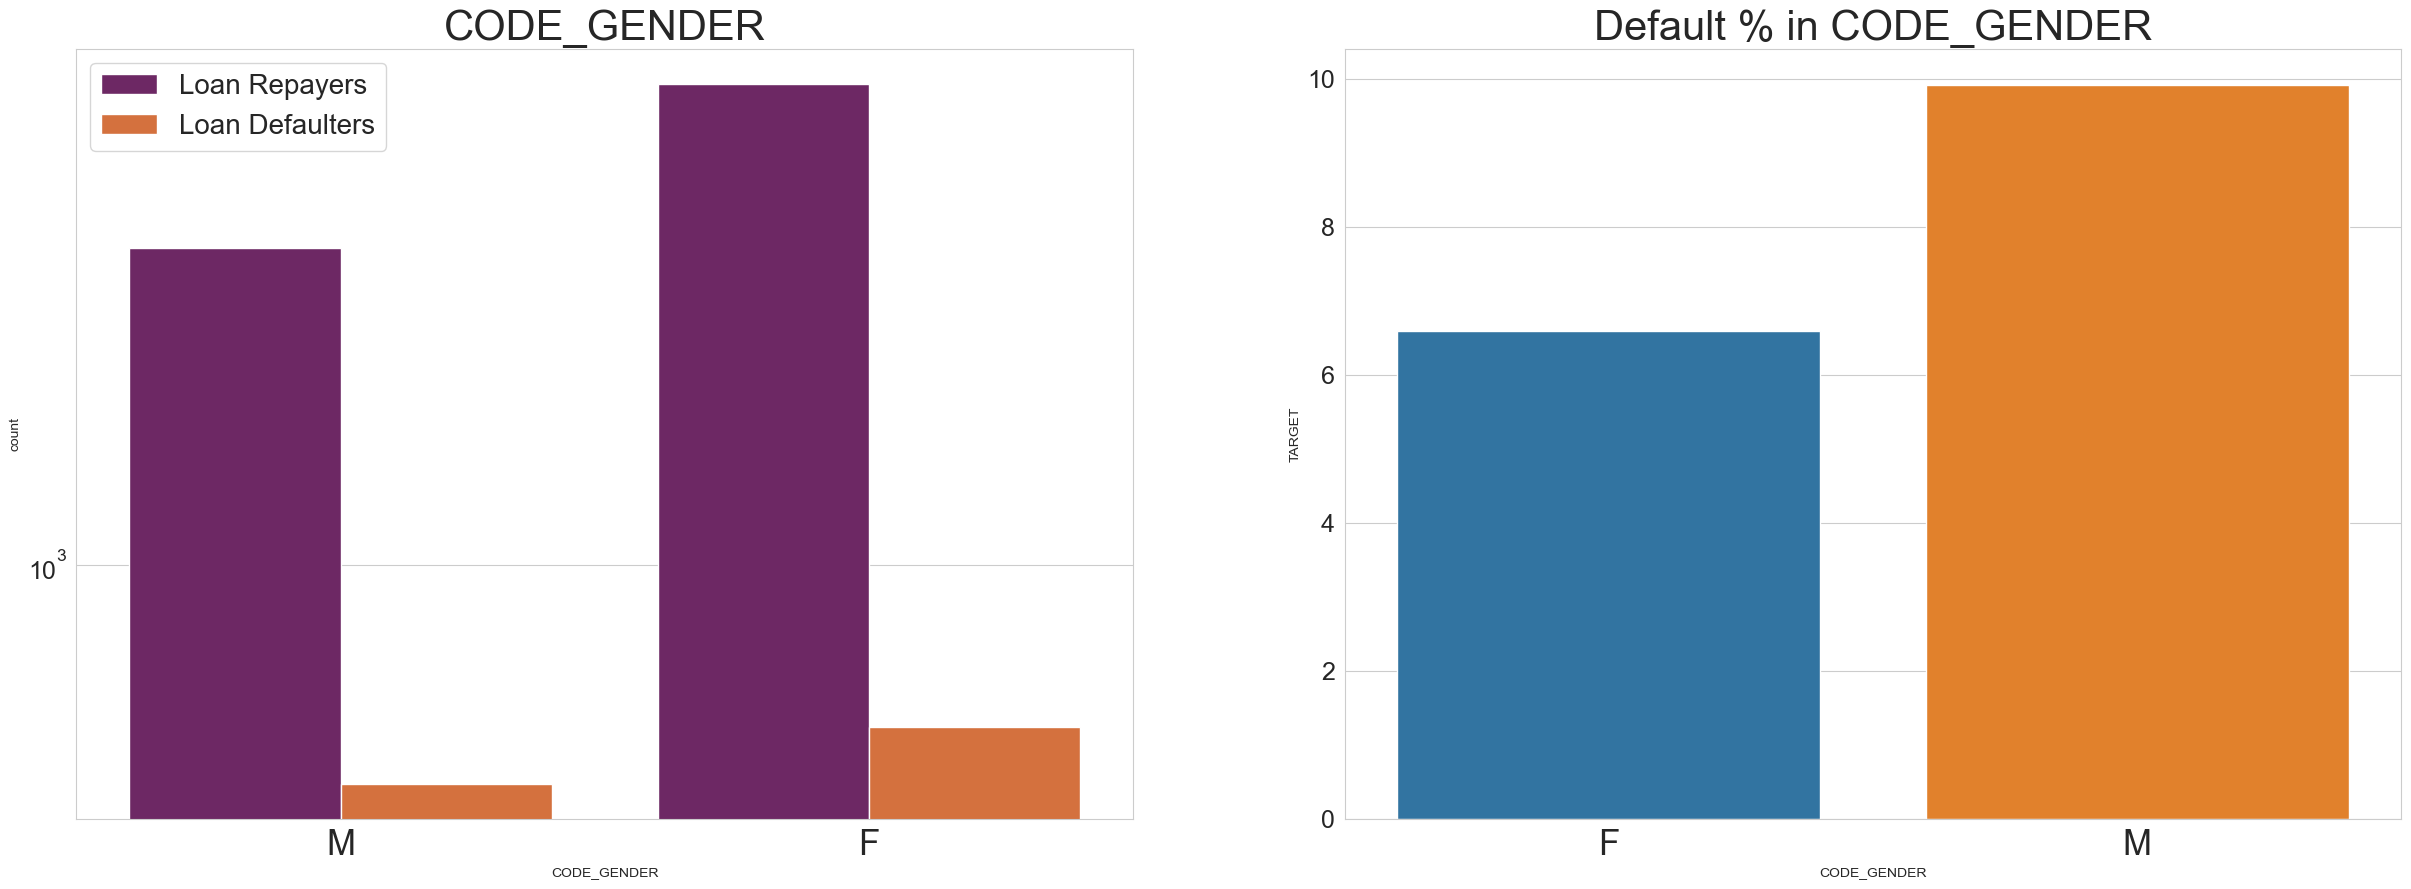

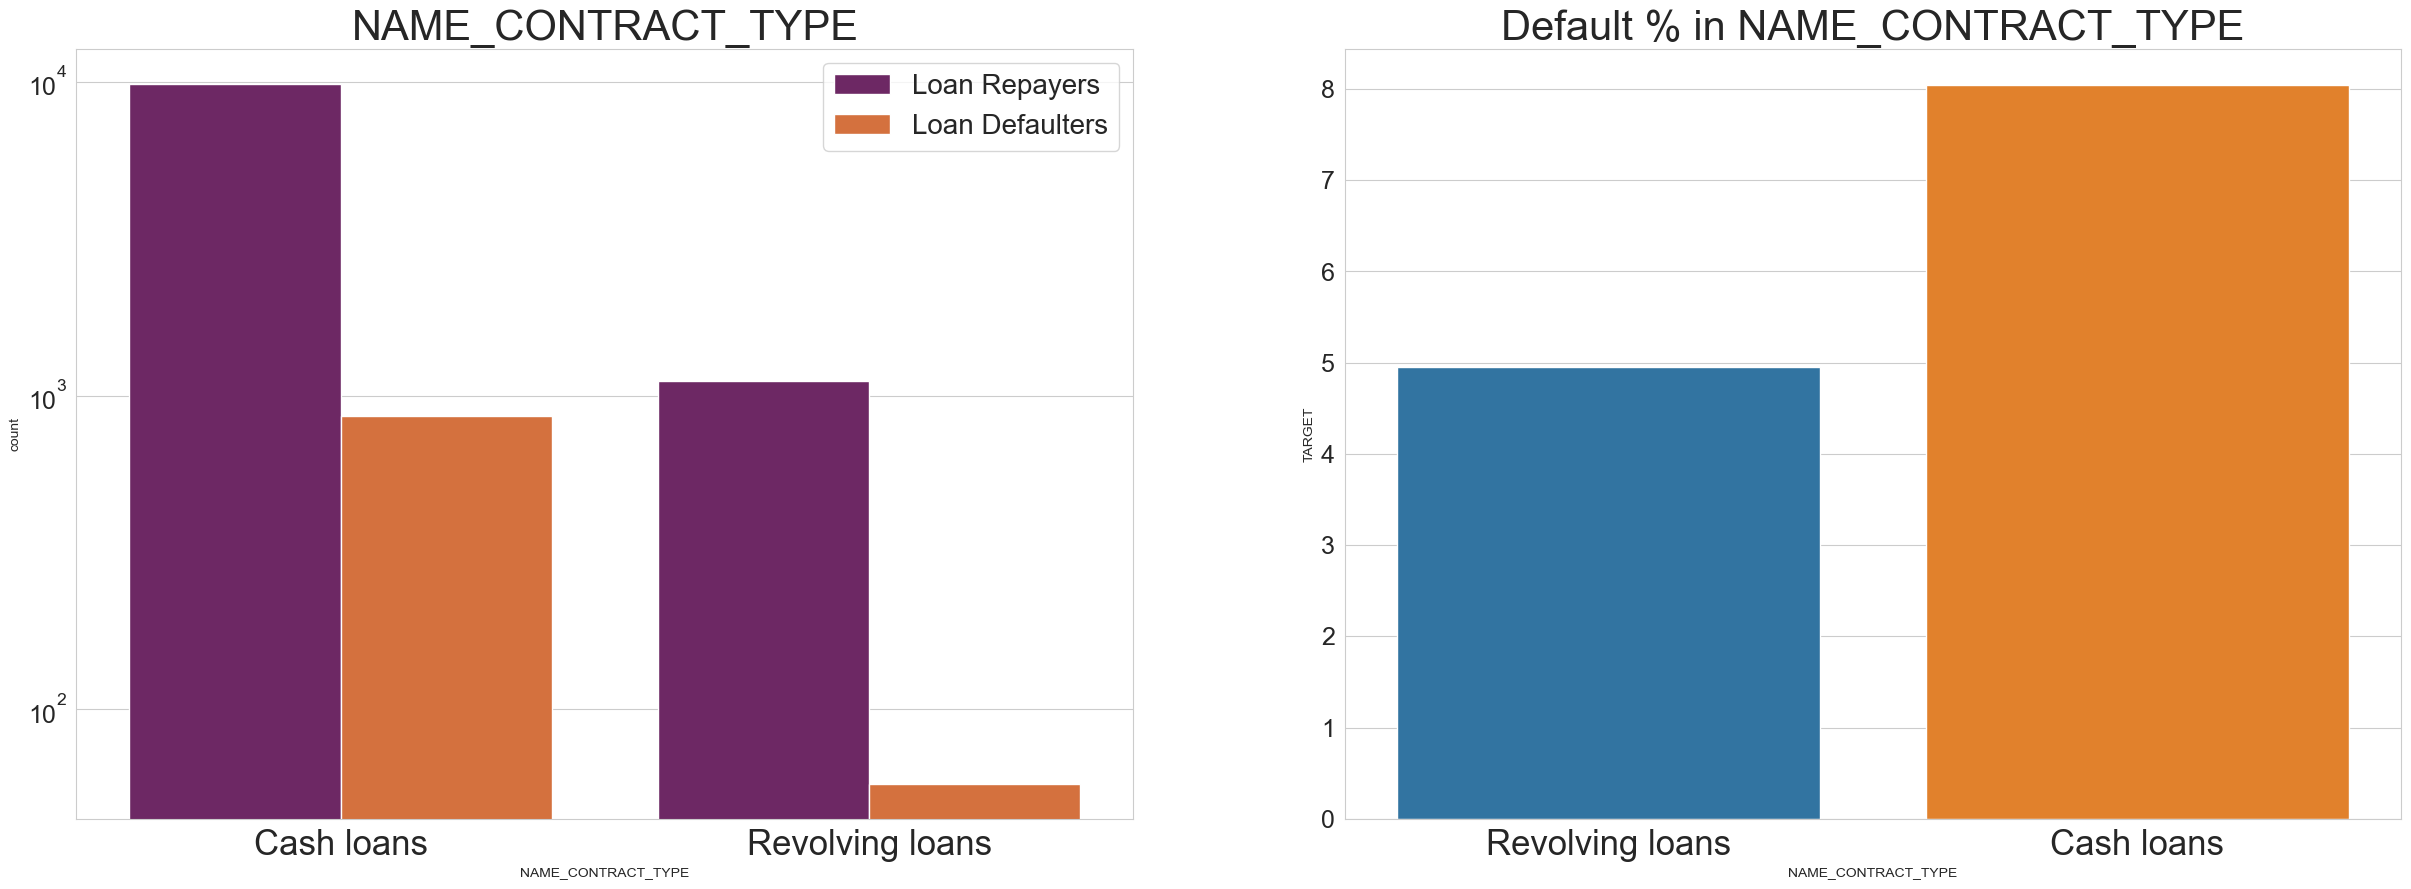

In [28]:
list_categories = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER','NAME_CONTRACT_TYPE']

for val in list_categories:
    plots(val,1,2,rot=0)

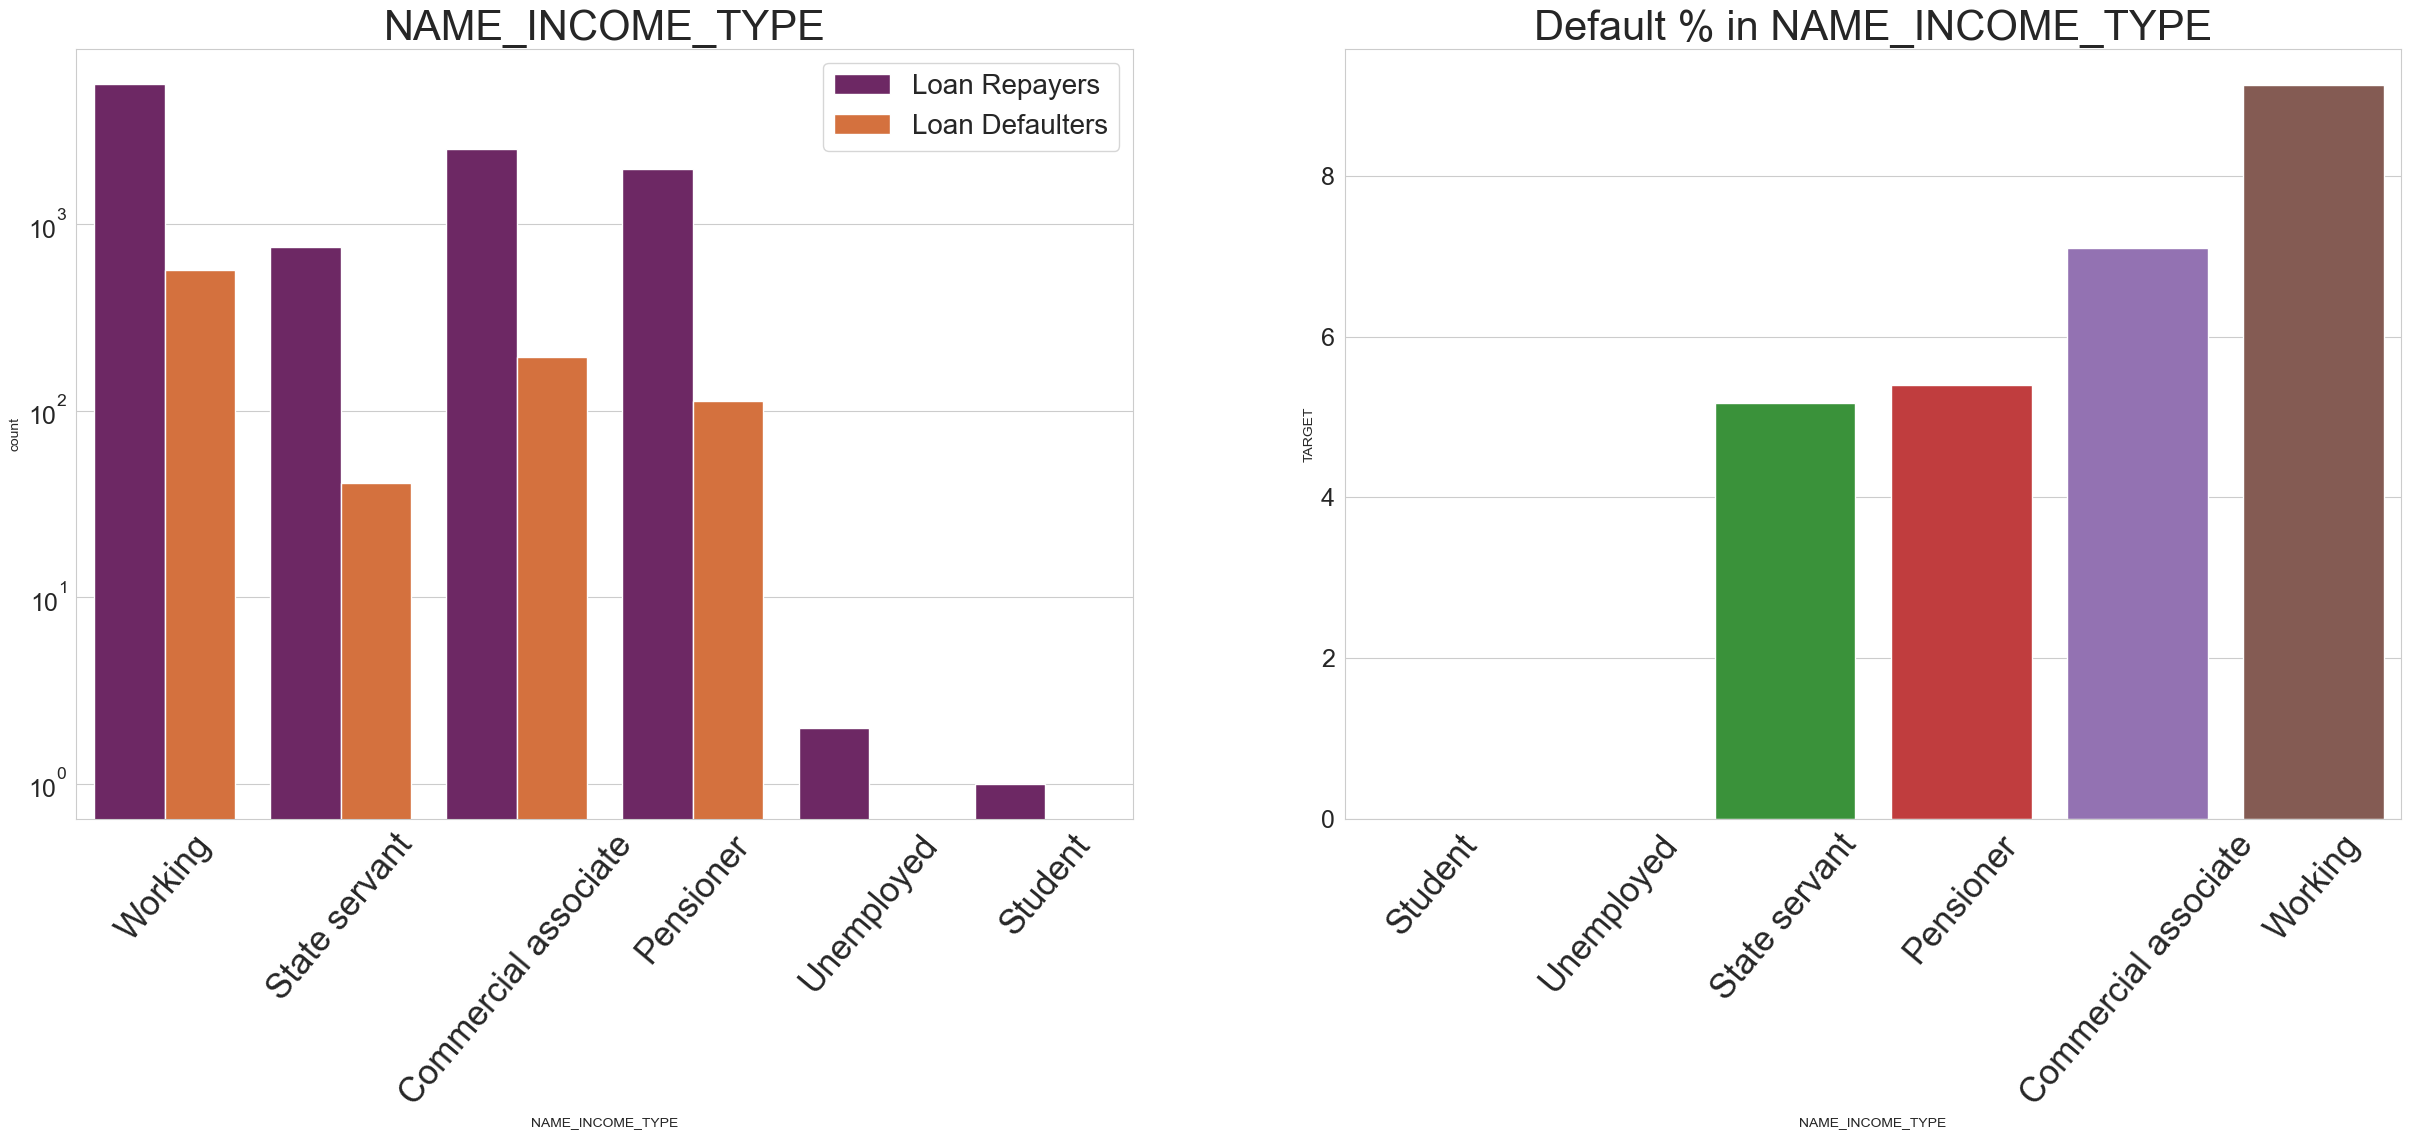

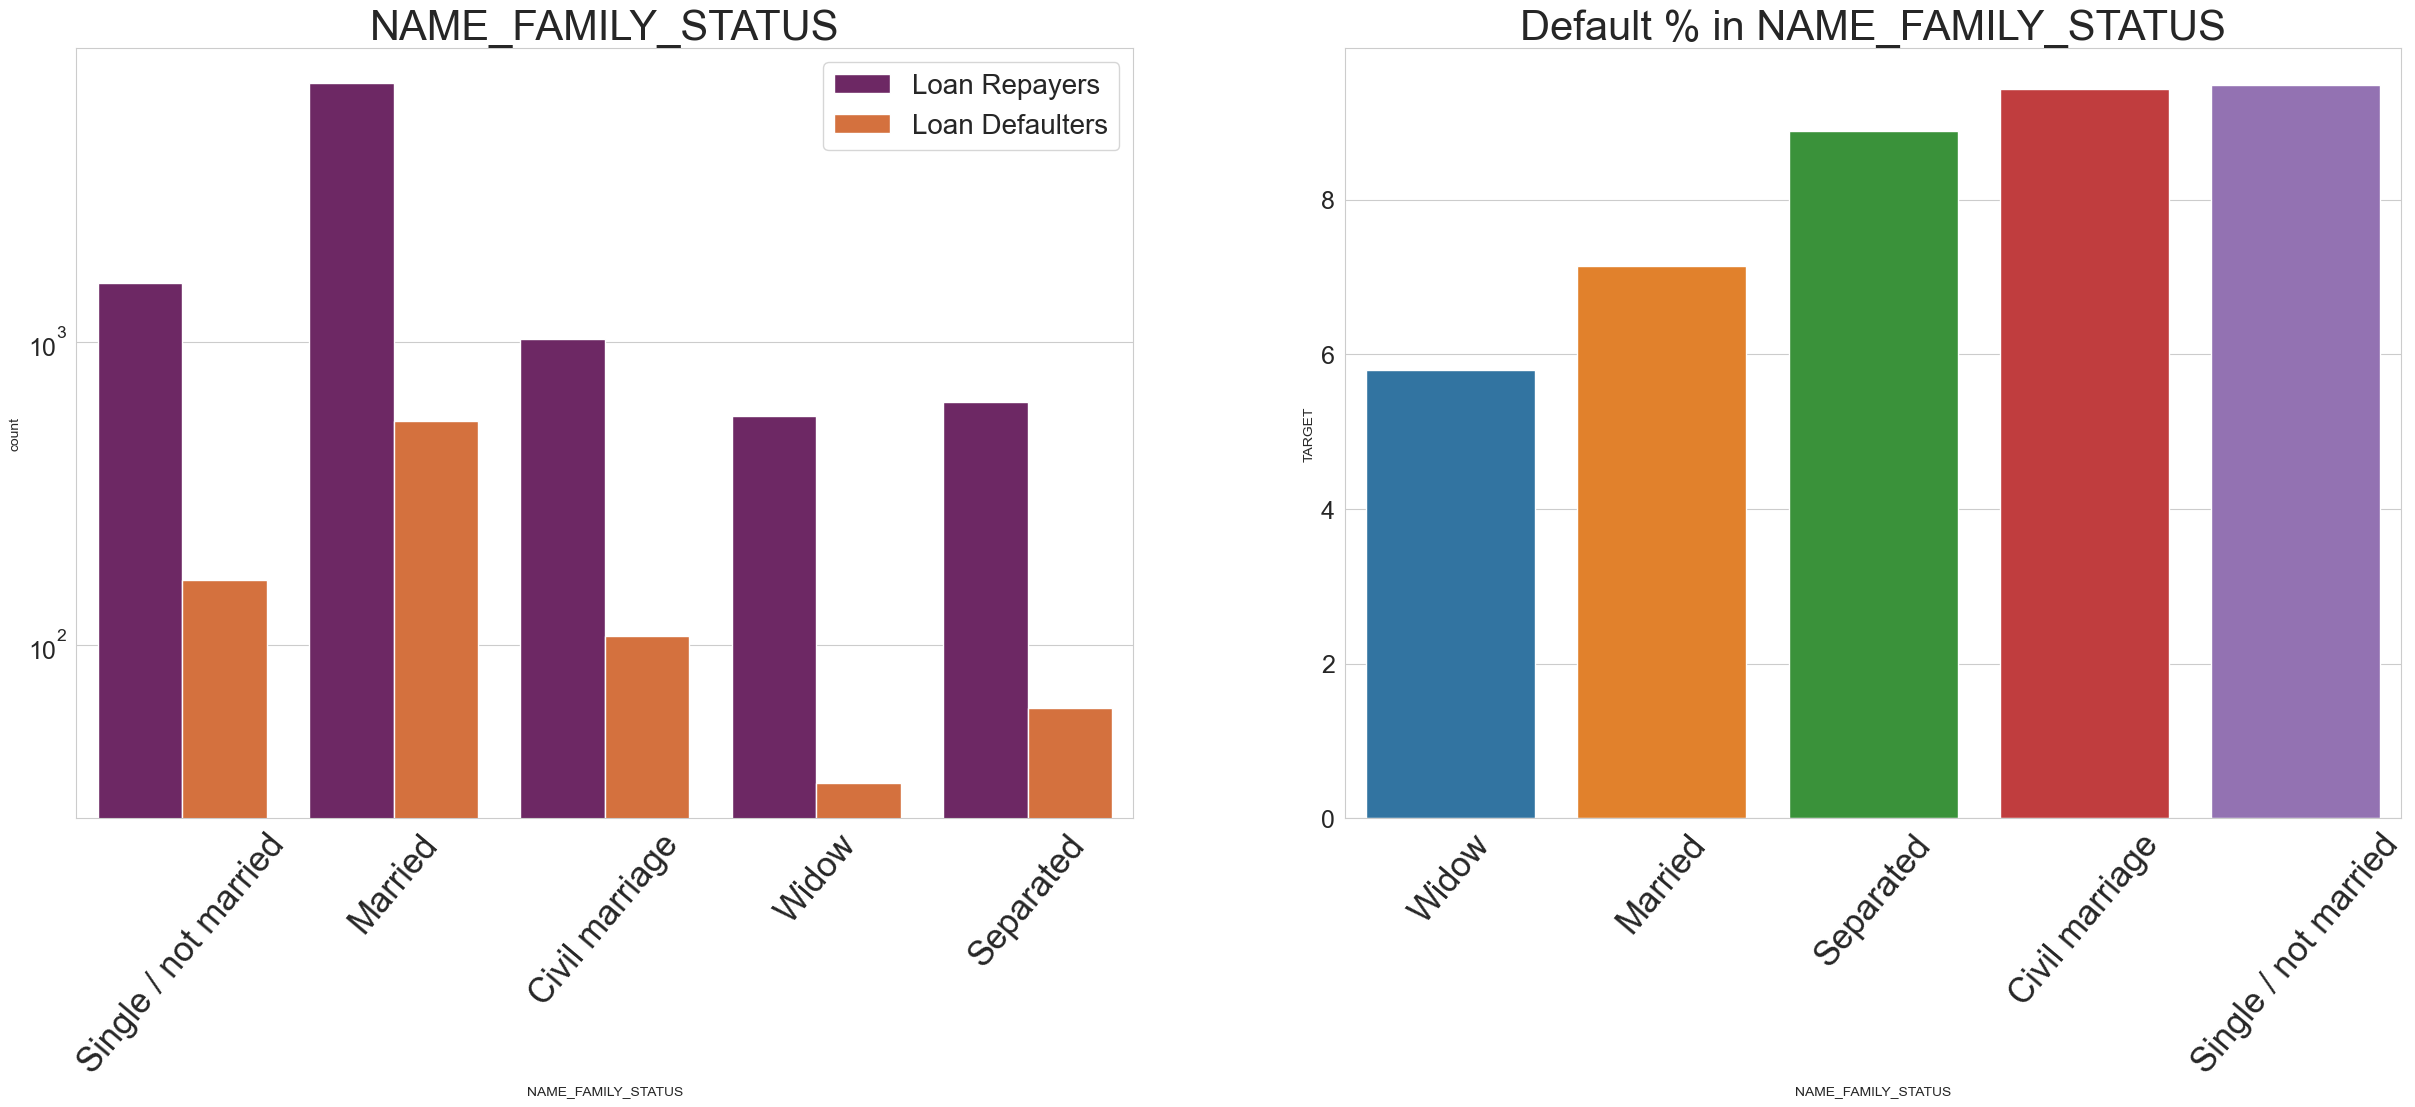

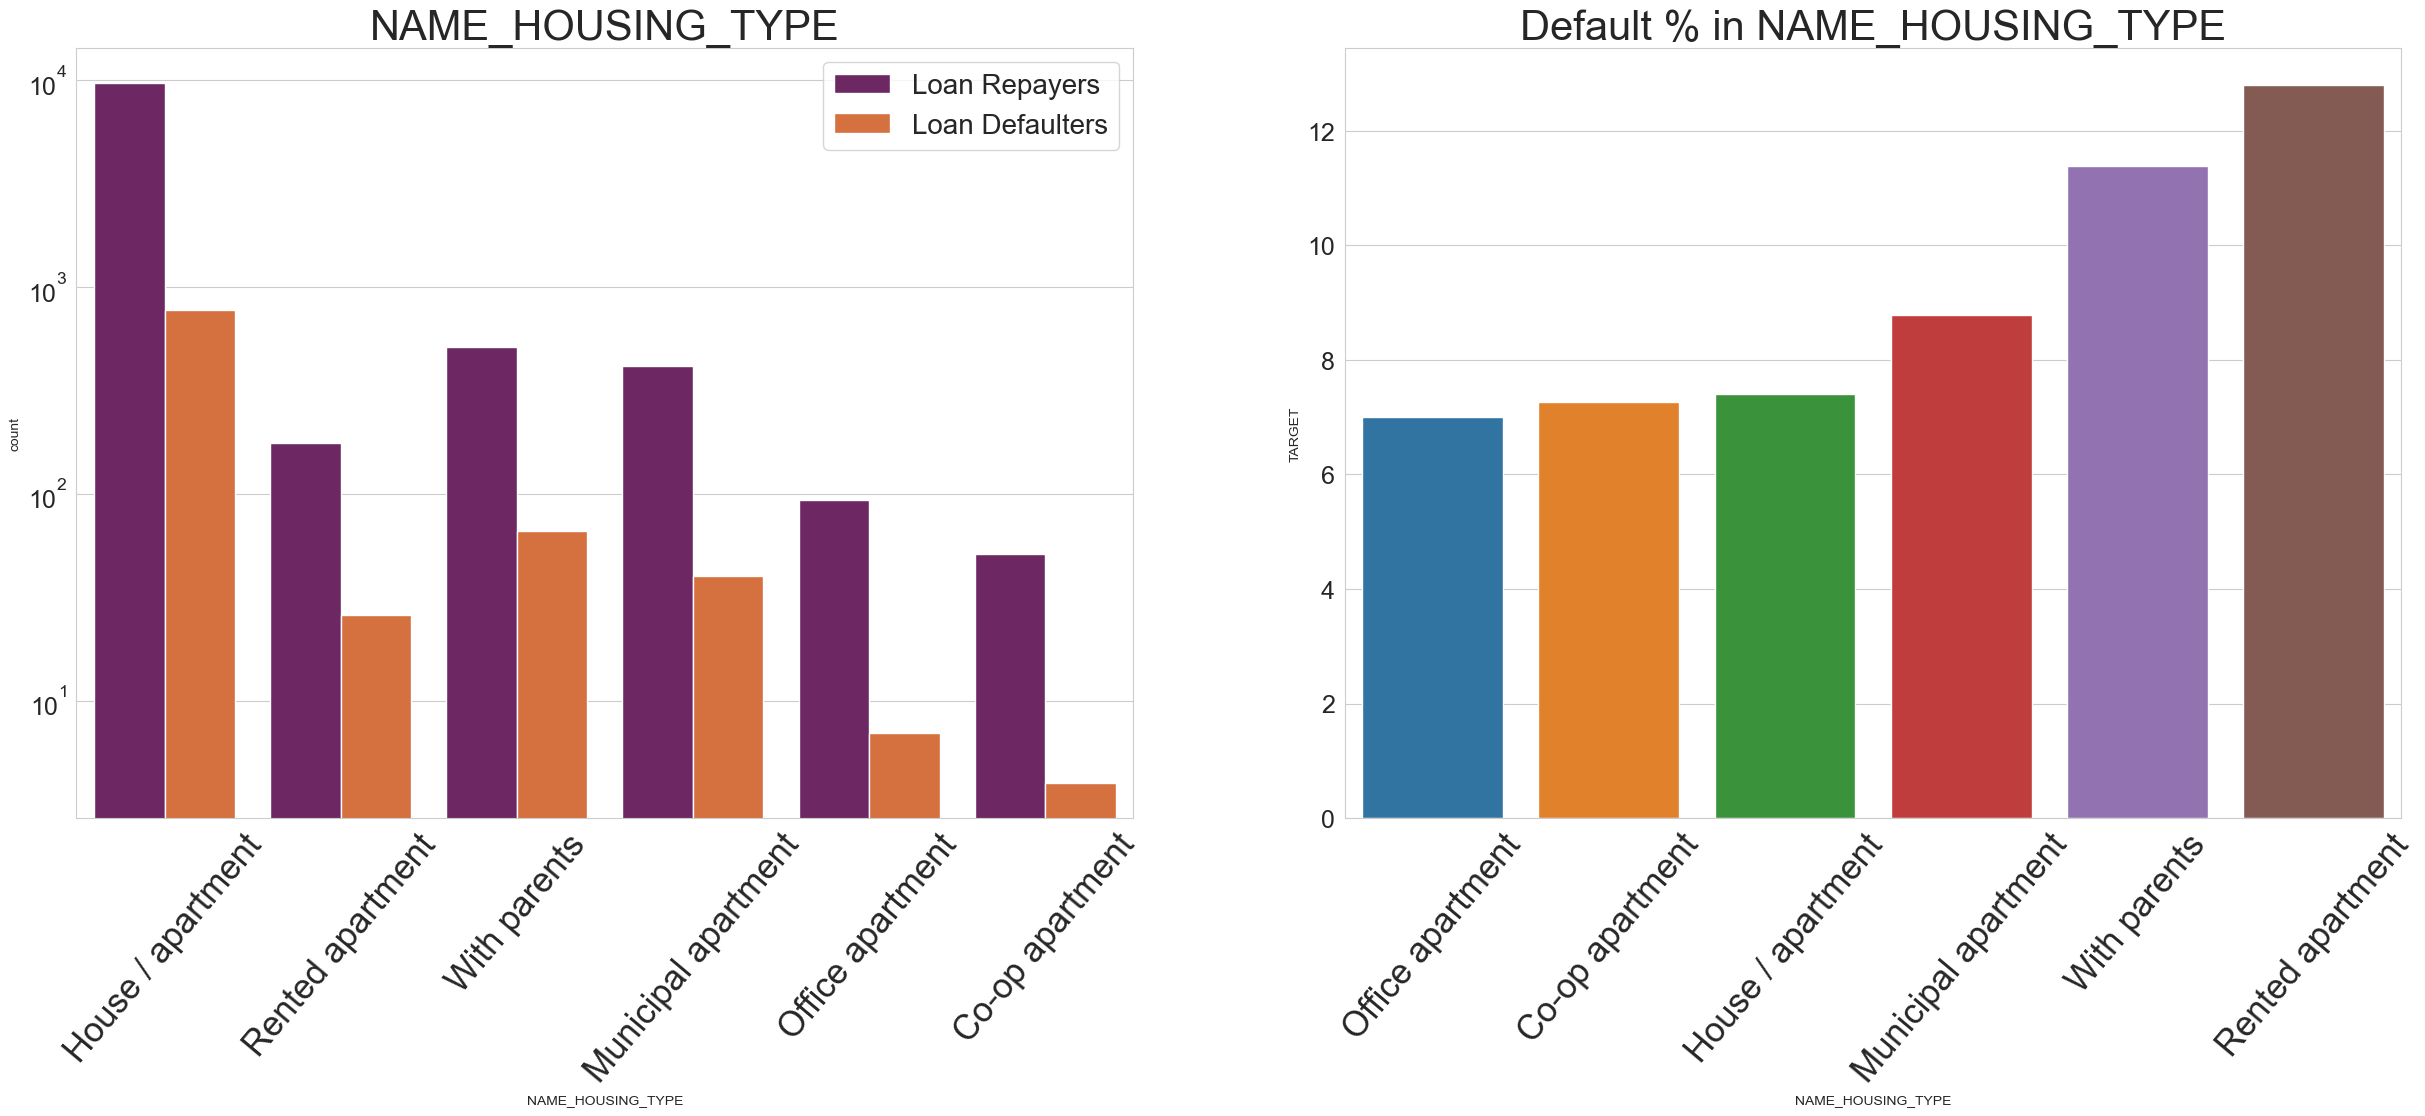

In [29]:
list_categories = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

for i in list_categories:
    plots(i,1,2,rot=50)

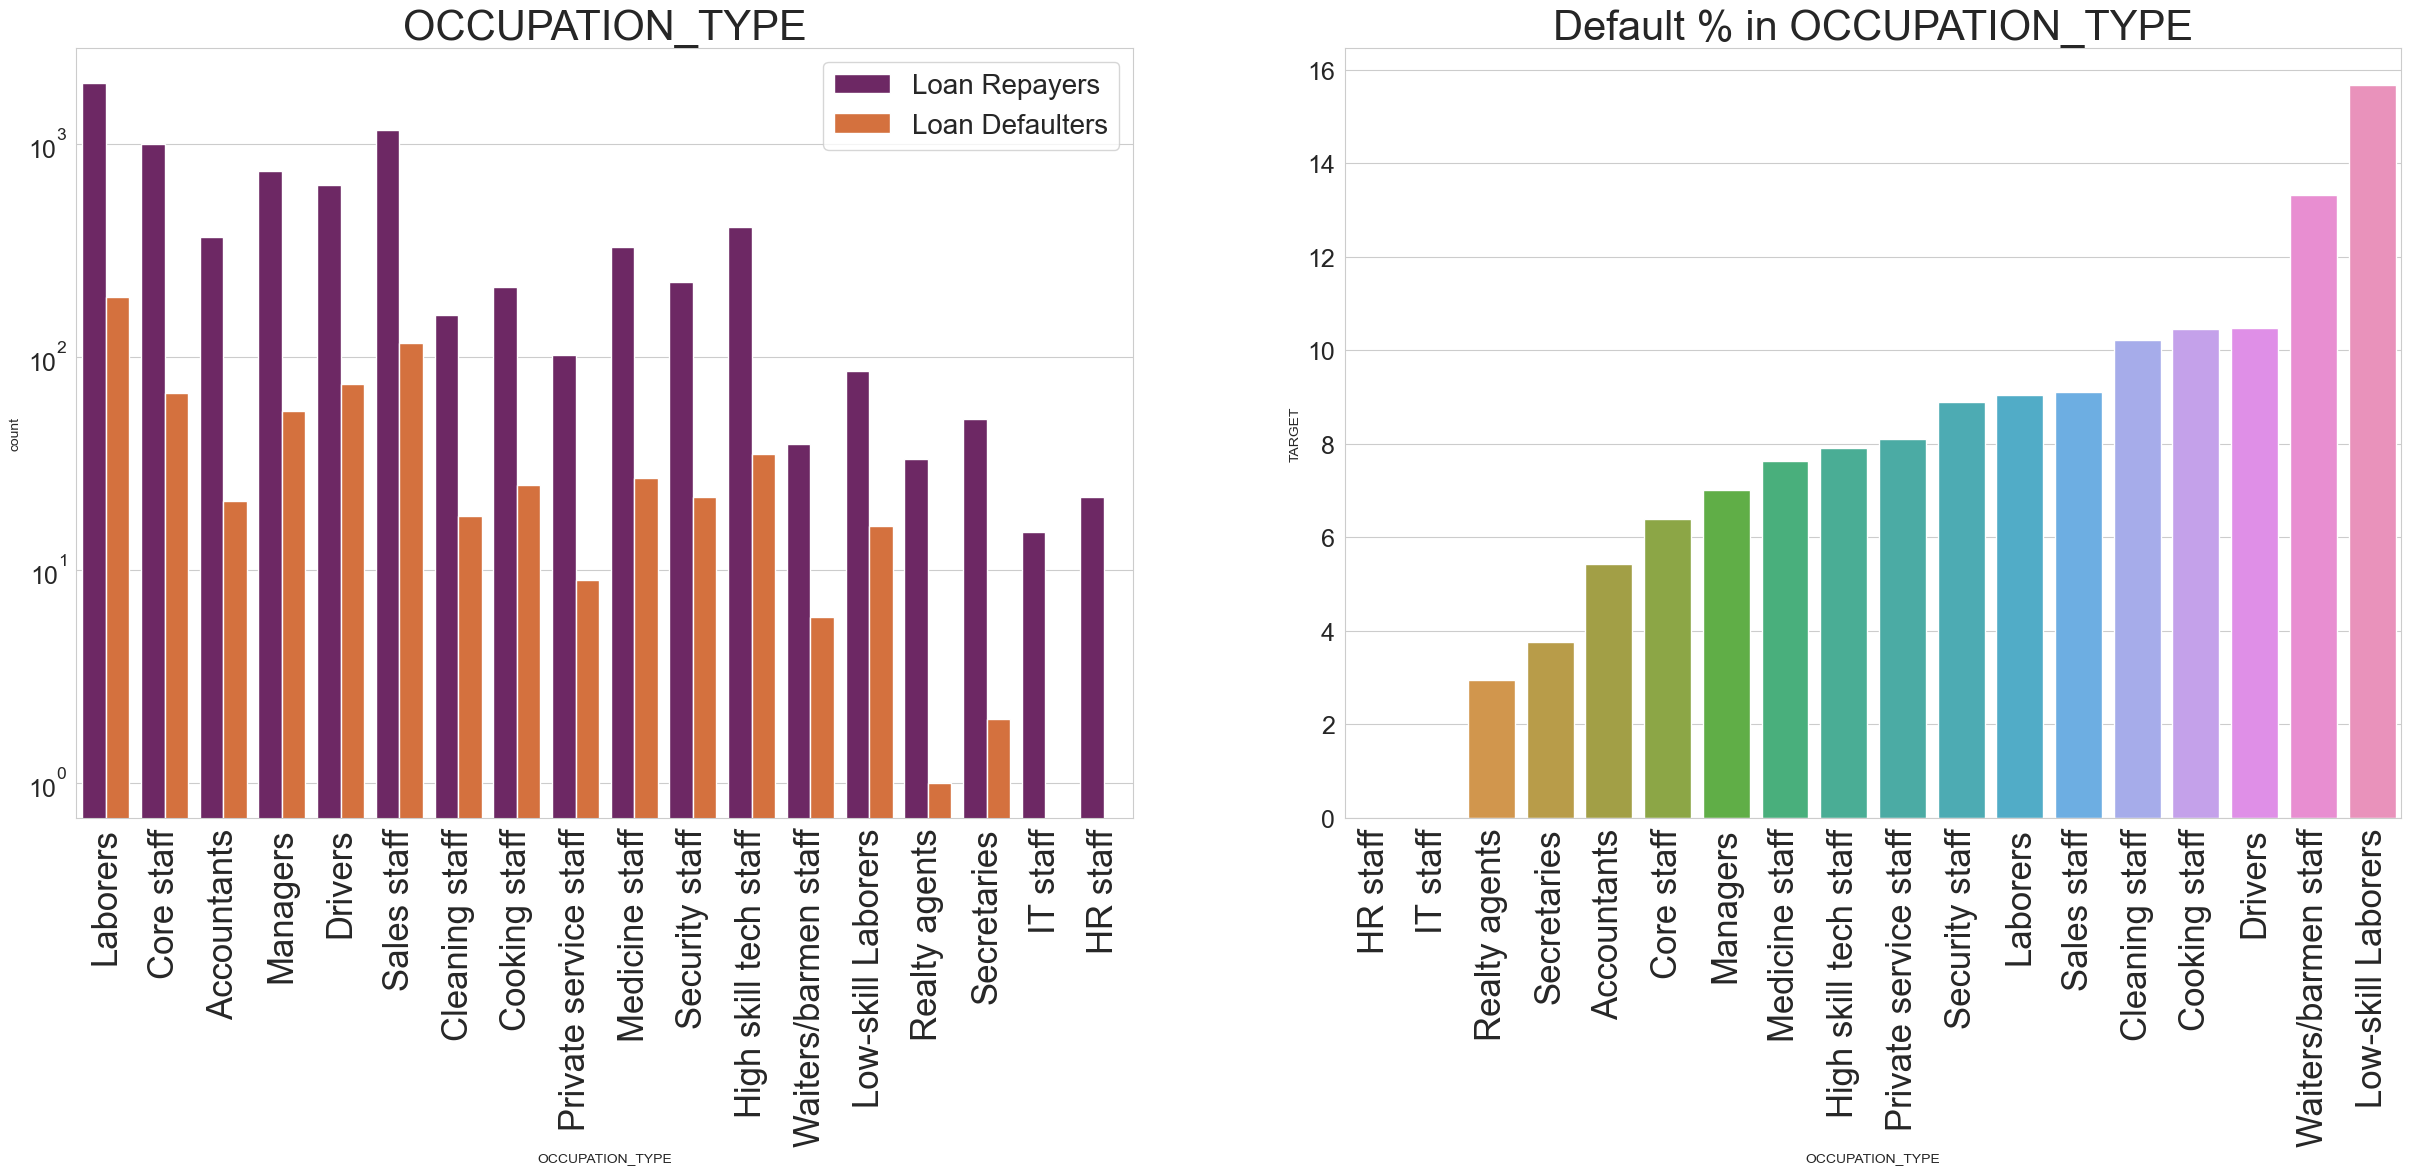

In [30]:
plots('OCCUPATION_TYPE',1,2)

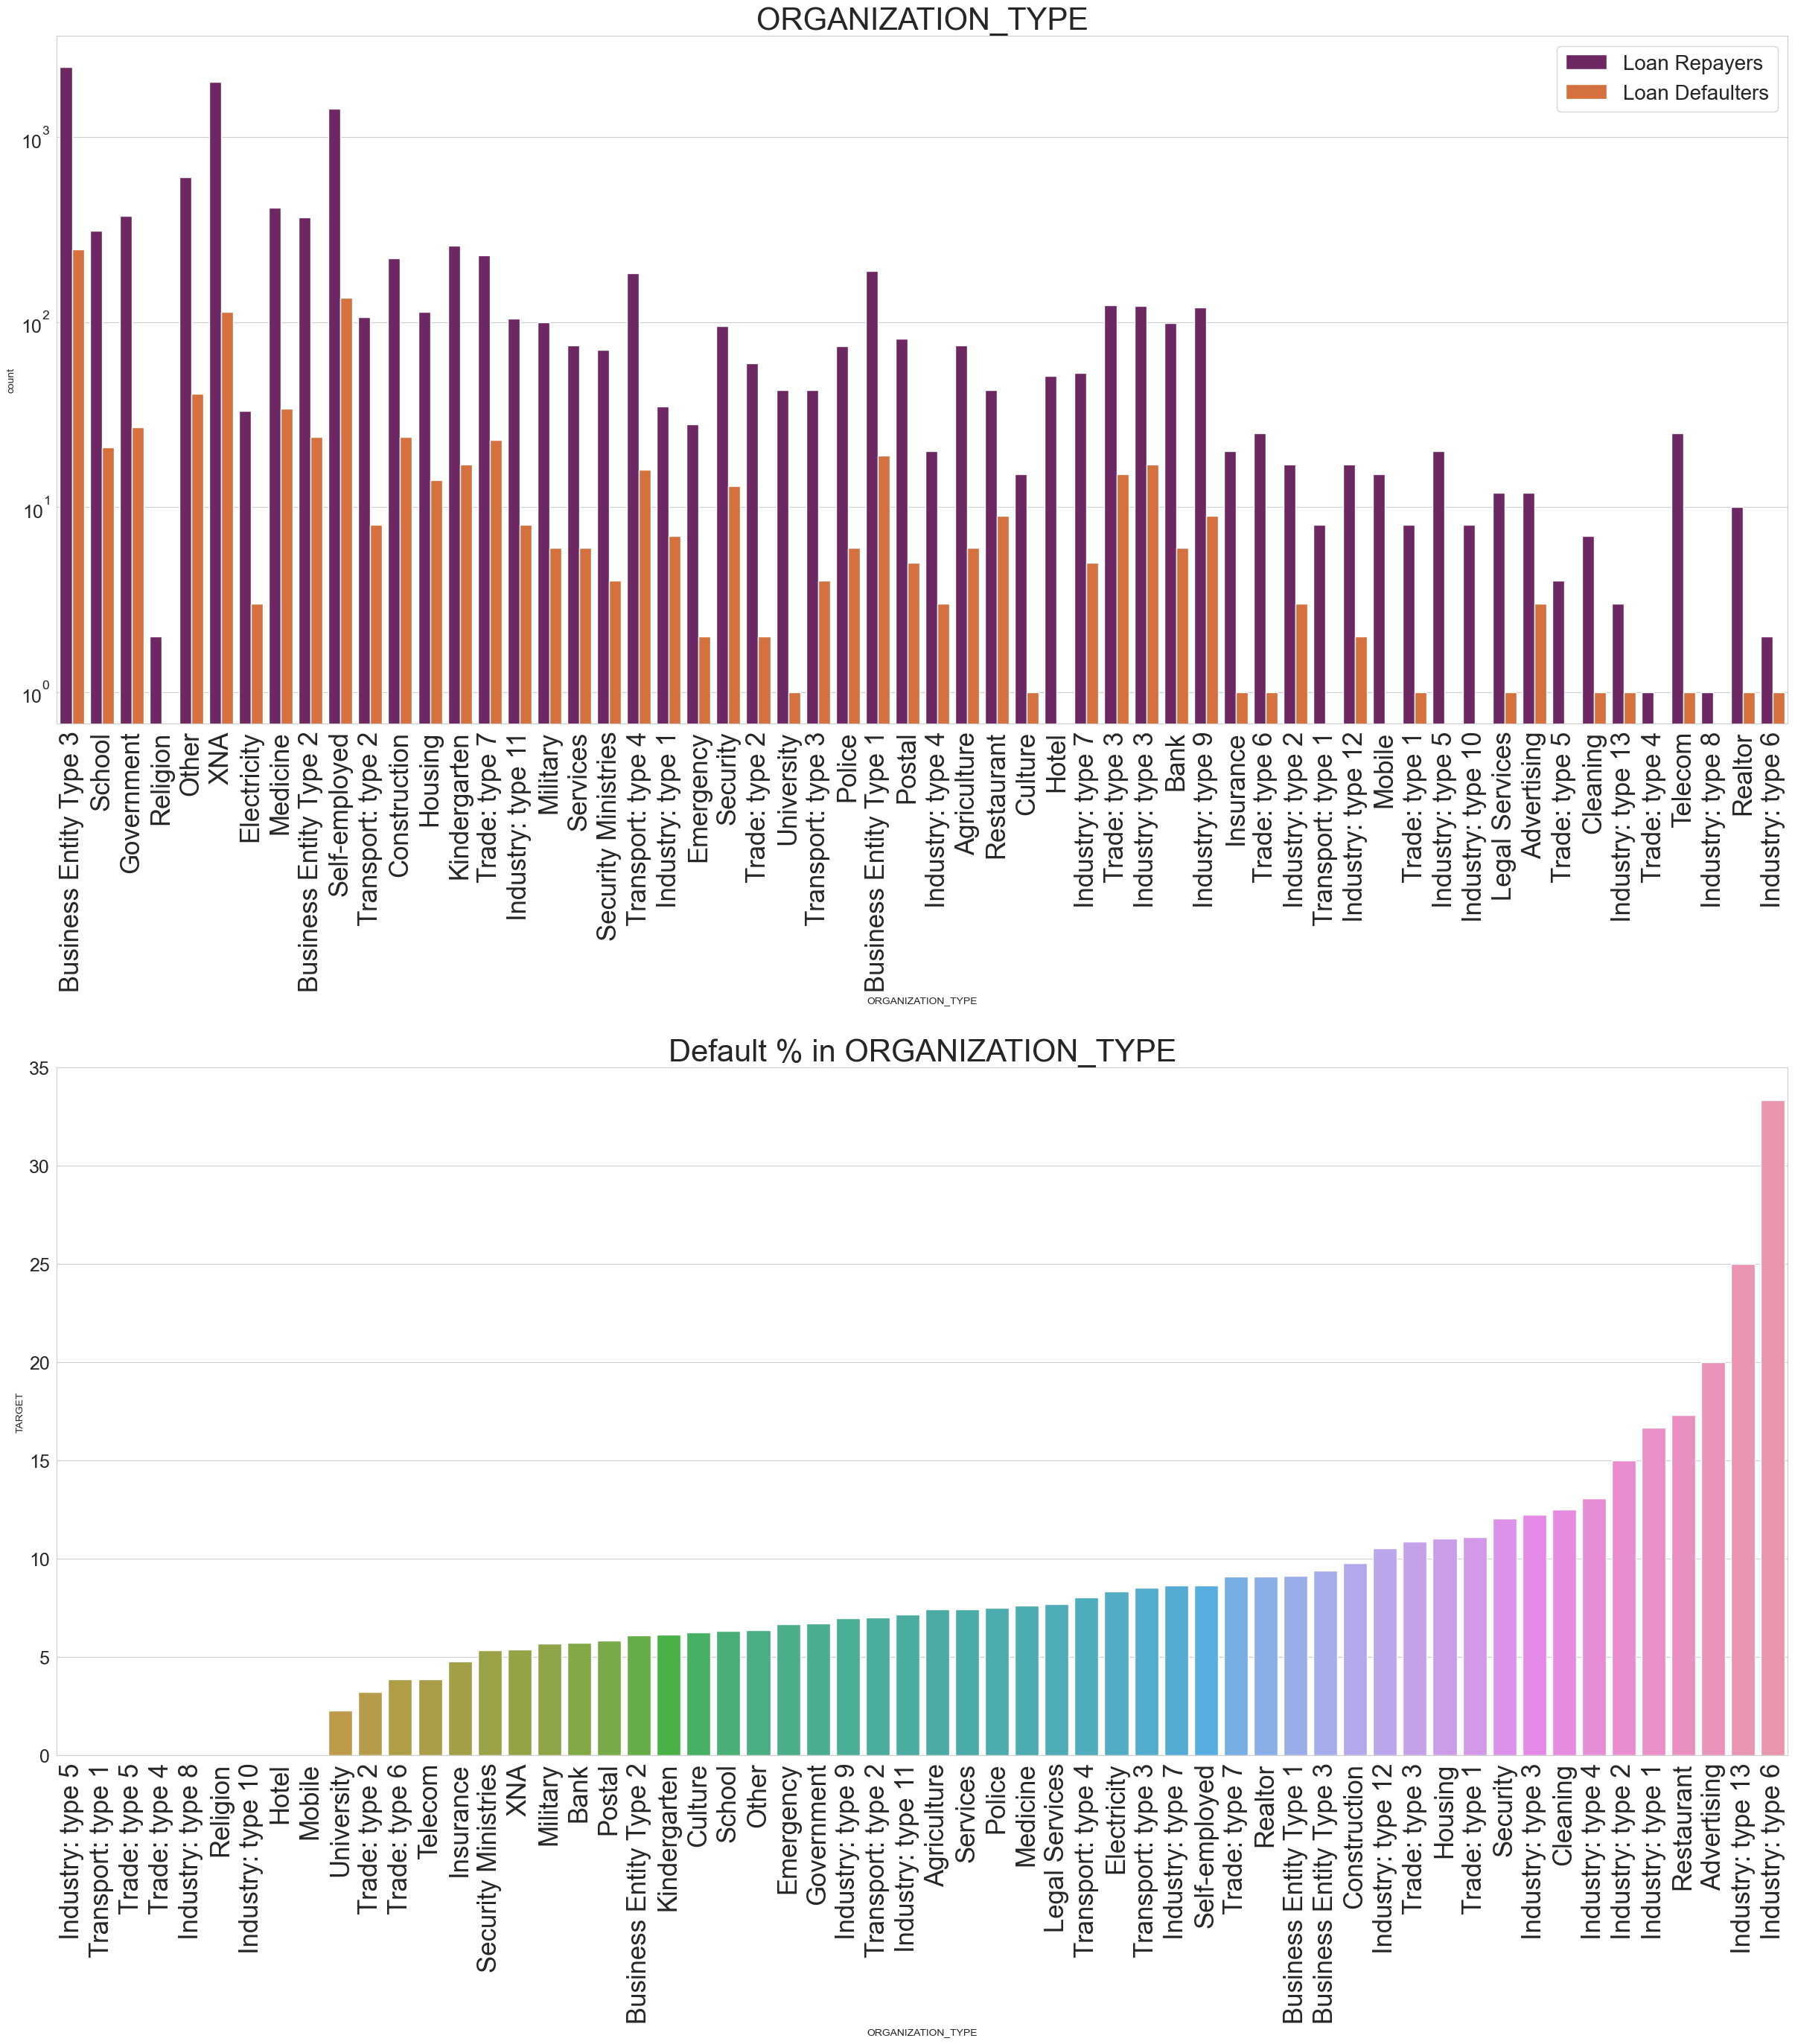

In [31]:
plots('ORGANIZATION_TYPE',rows=2)